# Dataset Presentation of CB6133_filtered

In [76]:
import numpy as np

# Load training data from cb6133
training_data = np.load('cb6133filtered.npy')
print('sequences:',training_data.shape[0],
      '\nfeatures:' ,training_data.shape[1])

('sequences', 5534) ('features', 39900)


In [77]:
# Pick the first sample (sequence) and reshape it to 700 x 57 (sequence length x features+labels) 
first_sequence = training_data[0,:].reshape((700,57))
print(first_sequence.shape,'\n',first_sequence)

(700, 57) 
 [[0.         0.         0.         ... 0.26894143 0.99938297 0.        ]
 [0.         0.         0.         ... 0.26894143 0.01551975 0.        ]
 [0.         0.         0.         ... 0.26894143 0.99969351 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [78]:
# Pick a residue in the sequence
ex = first_sequence[19,:]
print(ex)

[0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         1.         0.         0.24973989
 0.03696921 0.09029815 0.0541667  0.02558079 0.99860018 0.05265012
 0.01763634 0.07798824 0.01907719 0.03455623 0.16798161 0.05678619
 0.06723244 0.04608883 0.18694262 0.07585818 0.02558079 0.04031041
 0.26894143 0.02792257 0.        ]


In [87]:
# Analyze features for this residue
one_hot = ex[:22]
print('Residue (one hot encoded):\n',one_hot,'\n  A  C  E  D  G  F  I  H  K  M  L  N  Q  P  S  R  T  W  V  Y  X  NoSeq\n')
seq_str = ex[22:31]
print('Structure (one hot encoded):\n',seq_str,'\n  L  B  E  G  I  H  S  T  NoSeq\n')
ter = ex[31:33]
print('Terminals:\n',ter,'\n  N- C-\n')
solv = ex[33:35]
print('Solvent Accessibility:\n',solv, '\n Absolute and Relative solvent accessibility\n')
seq_prf = ex[35:57]
print('Profiles:\n',seq_prf, '\n  A  C  D  E  F  G  H  I  K  L  M  N  P  Q  R  S  T  V  W  X  Y\n')

Residue (one hot encoded):
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
  A  C  E  D  G  F  I  H  K  M  L  N  Q  P  S  R  T  W  V  Y  X  NoSeq

Structure (one hot encoded):
 [0. 0. 0. 0. 0. 0. 1. 0. 0.] 
  L  B  E  G  I  H  S  T  NoSeq

Terminals:
 [0. 0.] 
  N- C-

Solvent Accessibility:
 [1. 0.] 
 Absolute and Relative solvent accessibility

Profiles:
 [0.24973989 0.03696921 0.09029815 0.0541667  0.02558079 0.99860018
 0.05265012 0.01763634 0.07798824 0.01907719 0.03455623 0.16798161
 0.05678619 0.06723244 0.04608883 0.18694262 0.07585818 0.02558079
 0.04031041 0.26894143 0.02792257 0.        ] 
  A  C  D  E  F  G  H  I  K  L  M  N  P  Q  R  S  T  V  W  X  Y



In [80]:
# Compute label counts
str_counter = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
for i in range(training_data.shape[0]):
    sequence = training_data[i,:].reshape((700,57))
    structs = sequence[:, 22:31]
    sumstructs = np.sum(structs, axis = 0)
    str_counter +=  sumstructs
    

<BarContainer object of 9 artists>

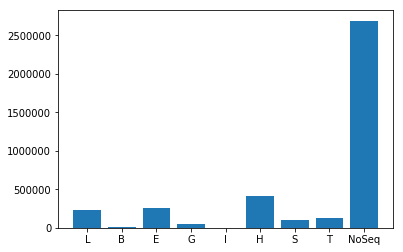

In [81]:
import matplotlib.pyplot as plt
plt.bar(['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T','NoSeq'],str_counter)

<BarContainer object of 8 artists>

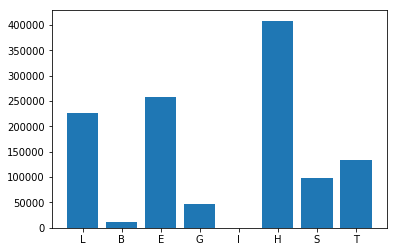

In [82]:
# plot once again without NoSeq
plt.bar(['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T'],str_counter[:-1])

In [83]:
# Compute residue counts
res_counter = np.array([0.]*22)
for i in range(training_data.shape[0]):
    sequence = training_data[i,:].reshape((700,57))
    ress = sequence[:, :22]
    sumress = np.sum(ress, axis = 0)
    res_counter +=  sumress

<BarContainer object of 22 artists>

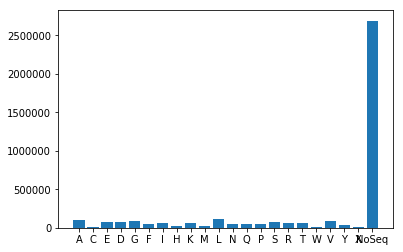

In [84]:
plt.bar(['A', 'C', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'M', 'L', 'N', 'Q', 'P', 'S', 'R', 'T', 'W', 'V', 'Y', 'X','NoSeq'],
        res_counter)

<BarContainer object of 21 artists>

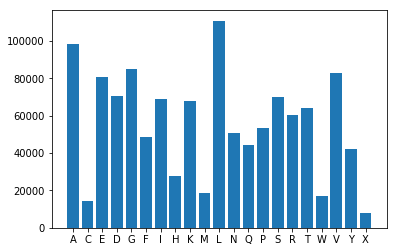

In [85]:
# plot once again without NoSeq
plt.bar(['A', 'C', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'M', 'L', 'N', 'Q', 'P', 'S', 'R', 'T', 'W', 'V', 'Y', 'X'],
        res_counter[:-1])

In [88]:
abs_solv = []
rel_solv = []
for i in range(training_data.shape[0]):
    sequence = training_data[i,:].reshape((700,57))
    abs_solv += list(sequence[:, 33])
    rel_solv += list(sequence[:, 34])

{0.0, 1.0} {0.0, 1.0}


<BarContainer object of 2 artists>

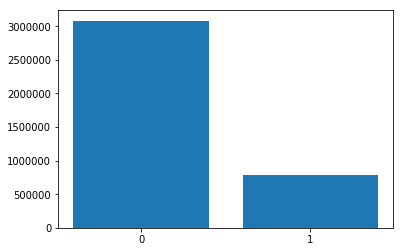

In [93]:
print(set(abs_solv), set(rel_solv))
plt.bar(['0','1'],[abs_solv.count(0), abs_solv.count(1)])

<BarContainer object of 2 artists>

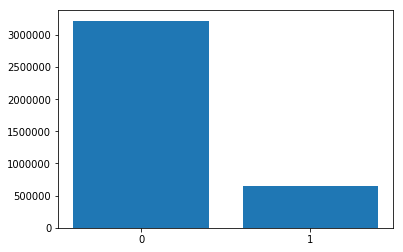

In [92]:
plt.bar(['0','1'],[rel_solv.count(0), rel_solv.count(1)])